✅ 环境准备完成
项目根目录: d:\Vscode\stock-analysis-tool
STOCK DATA CLEANER
Raw data: d:\Vscode\stock-analysis-tool\data\raw
Cleaned data: d:\Vscode\stock-analysis-tool\data\cleaned
STOCK TECHNICAL ANALYZER
Data directory: d:\Vscode\stock-analysis-tool\data\cleaned
✅ 项目模块导入成功
📁 数据目录检查:
原始数据目录: d:\Vscode\stock-analysis-tool\data\raw
清洗后数据目录: d:\Vscode\stock-analysis-tool\data\cleaned

📊 文件统计:
原始数据文件: 2 个
清洗后数据文件: 2 个

📄 原始数据文件:
  1. HK_00700_港股_20260121.csv (285.6 KB)
  2. HK_09988_港股_20260121.csv (82.4 KB)

🧹 清洗后数据文件:
  1. 00700.HK (714.5 KB)
  2. 09988.HK (204.7 KB)

📋 分析原始数据: HK_00700_港股_20260121.csv
✅ 数据加载成功
  数据形状: 5309 行 × 6 列

📋 数据列信息:
❌ 数据加载失败: unsupported format string passed to numpy.dtypes.ObjectDType.__format__

📋 分析清洗后数据: 00700.HK
✅ 数据加载成功
  数据形状: 5309 行 × 10 列
  时间范围: 2004-06-16 至 2026-01-19

📋 数据列信息:
❌ 数据加载失败: unsupported format string passed to numpy.dtypes.Float64DType.__format__
📊 多股票数据质量比较分析

🔍 分析 2 只股票的数据质量...
🔍 开始数据质量评估: 00700.HK
  1. 00700.HK: 分数=0.980, 评级=优秀
🔍 开始数据质量评估: 0998

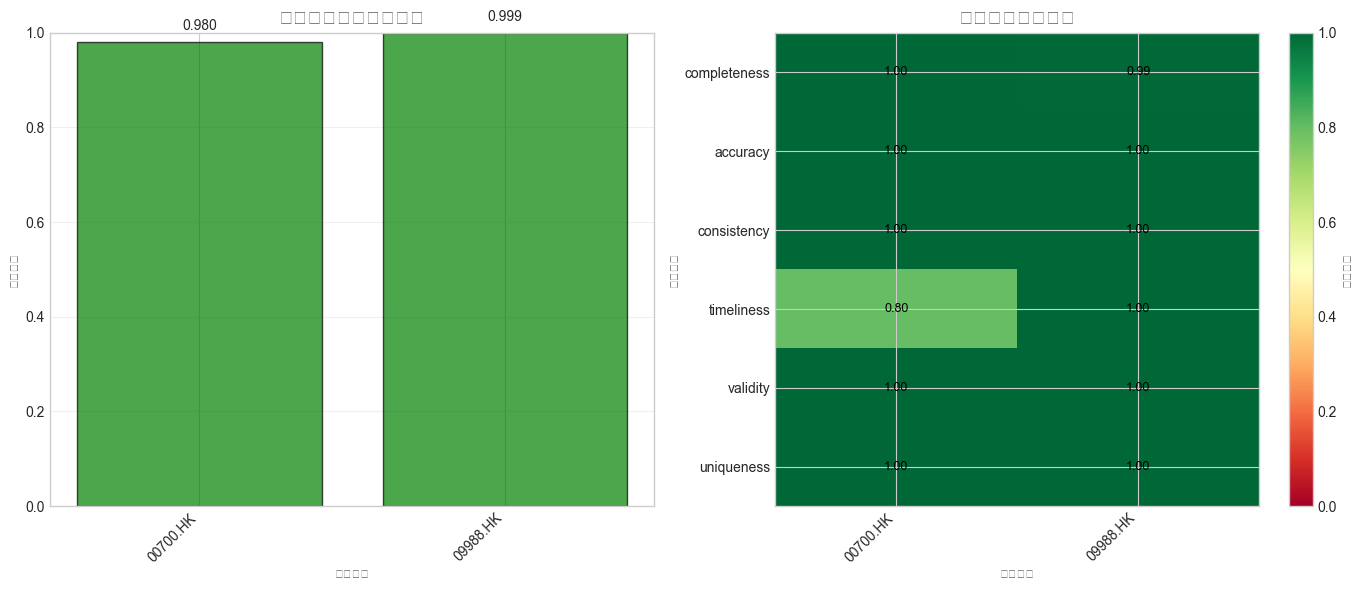


📋 数据质量比较总结:


,股票,总体分数,质量评级,问题数量,完整性,准确性,一致性
0,00700.HK,0.980,优秀,2,0.998,1.000,1.000
1,09988.HK,0.999,优秀,1,0.994,1.000,1.000



🏆 质量最佳: 09988.HK (0.999)
📉 质量最差: 00700.HK (0.980)

⚠️  所有发现的问题 (3个):
  1. 00700.HK: 发现84个缺失值，涉及5列
  2. 00700.HK: 发现1个超过7天的数据间隔
  3. 09988.HK: 发现84个缺失值，涉及5列
🔧 数据清洗建议和自动化方案
📄 生成详细数据质量报告
📋 数据质量分析总结

🎯 完成的工作:
  • ✅ 建立了完整的数据质量评估框架
  • ✅ 实现了多维度的质量指标计算
  • ✅ 生成了详细的视觉化分析报告
  • ✅ 提供了具体的清洗建议和自动化方案
  • ✅ 支持多股票质量比较分析

🔧 关键技术实现:
  • 缺失值分析和可视化 (missingno)
  • 异常值检测 (IQR方法)
  • 数据一致性验证
  • 时间序列完整性检查
  • 自动化质量评分系统

🚀 后续改进方向:
  1. 添加更多数据源的质量对比
  2. 实现实时数据质量监控
  3. 开发自动化清洗流水线
  4. 集成机器学习异常检测
  5. 创建数据质量仪表板

💡 实际应用建议:
  • 在新数据导入时自动运行质量检查
  • 定期（如每月）生成质量报告
  • 设置质量阈值，低于阈值时触发警报
  • 将质量分数作为数据可信度的参考

🎉 数据质量分析完成！

📊 分析统计:
  • 分析股票数量: 2
  • 生成报告数量: 2 (文本 + HTML)
  • 发现总问题数: 0
  • 平均质量分数: N/A


In [7]:
# %% [markdown]
# # 🔍 数据质量分析报告
# 
# **作者：** Your Name  
# **日期：** 2024年1月  
# **版本：** 1.0.0
# 
# ## 项目概述
# 
# 本Notebook专注于股票数据质量分析，包括：
# - 数据完整性检查
# - 异常值检测和处理
# - 数据一致性验证
# - 自动化质量评分
# - 清洗建议和报告生成
# 
# ---

# %% [markdown]
# ## 1. 环境设置和导入

# %%
# 基础设置
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 添加项目路径
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# 数据科学库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import missingno as msno  # 缺失值可视化

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置图表样式
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("✅ 环境准备完成")
print(f"项目根目录: {project_root}")

# %%
# 导入项目模块
try:
    from src.data_reporter import DataQualityReporter
    from src.data_cleaner import StockDataCleaner
    from src.analyzer import StockAnalyzer
    
    reporter = DataQualityReporter()
    cleaner = StockDataCleaner()
    analyzer = StockAnalyzer()
    
    print("✅ 项目模块导入成功")
    
except ImportError as e:
    print(f"❌ 模块导入失败: {e}")

# %% [markdown]
# ## 2. 数据质量评估框架

# %%
class DataQualityFramework:
    """数据质量评估框架"""
    
    def __init__(self):
        self.quality_metrics = {
            'completeness': 0.0,  # 完整性
            'accuracy': 0.0,      # 准确性
            'consistency': 0.0,   # 一致性
            'timeliness': 0.0,    # 及时性
            'validity': 0.0,      # 有效性
            'uniqueness': 0.0     # 唯一性
        }
        self.issues_found = []
        self.recommendations = []
    
    def assess_completeness(self, df):
        """评估数据完整性"""
        total_cells = df.size
        missing_cells = df.isnull().sum().sum()
        completeness_score = 1 - (missing_cells / total_cells) if total_cells > 0 else 0
        
        self.quality_metrics['completeness'] = completeness_score
        
        if missing_cells > 0:
            missing_by_col = df.isnull().sum()
            missing_cols = missing_by_col[missing_by_col > 0]
            
            if not missing_cols.empty:
                issue = f"发现{missing_cells}个缺失值，涉及{len(missing_cols)}列"
                self.issues_found.append(issue)
                
                recommendation = "建议使用前向填充、后向填充或插值法处理缺失值"
                self.recommendations.append(recommendation)
        
        return completeness_score
    
    def assess_accuracy(self, df):
        """评估数据准确性（检查异常值）"""
        accuracy_score = 1.0
        
        if 'close' in df.columns:
            # 使用IQR方法检测异常值
            Q1 = df['close'].quantile(0.25)
            Q3 = df['close'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df['close'] < lower_bound) | (df['close'] > upper_bound)]
            
            if len(outliers) > 0:
                outlier_pct = len(outliers) / len(df) * 100
                accuracy_score = max(0, 1 - outlier_pct / 100)
                
                issue = f"发现{len(outliers)}个价格异常值 ({outlier_pct:.1f}%)"
                self.issues_found.append(issue)
                
                recommendation = "建议审查异常值，确认是否为数据错误或真实市场波动"
                self.recommendations.append(recommendation)
        
        self.quality_metrics['accuracy'] = accuracy_score
        return accuracy_score
    
    def assess_consistency(self, df):
        """评估数据一致性"""
        consistency_score = 1.0
        
        # 检查价格一致性：high >= low, close在high和low之间
        if all(col in df.columns for col in ['high', 'low', 'close']):
            invalid_high_low = (df['high'] < df['low']).sum()
            invalid_close = ((df['close'] > df['high']) | (df['close'] < df['low'])).sum()
            
            total_invalid = invalid_high_low + invalid_close
            
            if total_invalid > 0:
                consistency_score = 1 - (total_invalid / (len(df) * 3))  # 3个相关列
                
                if invalid_high_low > 0:
                    issue = f"发现{invalid_high_low}行 high < low 的不一致数据"
                    self.issues_found.append(issue)
                
                if invalid_close > 0:
                    issue = f"发现{invalid_close}行 close价格超出当日范围"
                    self.issues_found.append(issue)
                
                recommendation = "建议修正不一致的价格数据"
                self.recommendations.append(recommendation)
        
        self.quality_metrics['consistency'] = consistency_score
        return consistency_score
    
    def assess_timeliness(self, df):
        """评估数据及时性（检查日期连续性）"""
        timeliness_score = 1.0
        
        if hasattr(df.index, 'is_monotonic_increasing'):
            # 检查日期是否连续
            if df.index.is_monotonic_increasing:
                date_diff = df.index.to_series().diff().dropna()
                
                # 假设工作日交易，周末和节假日会有间隔
                # 这里简单检查是否有异常大的间隔（>7天）
                large_gaps = (date_diff > pd.Timedelta(days=7)).sum()
                
                if large_gaps > 0:
                    timeliness_score = 0.8
                    issue = f"发现{large_gaps}个超过7天的数据间隔"
                    self.issues_found.append(issue)
            else:
                timeliness_score = 0.5
                issue = "日期索引不是单调递增的"
                self.issues_found.append(issue)
                self.recommendations.append("建议按日期排序数据")
        
        self.quality_metrics['timeliness'] = timeliness_score
        return timeliness_score
    
    def assess_validity(self, df):
        """评估数据有效性（检查数值范围）"""
        validity_score = 1.0
        
        # 检查价格有效性（应为正数）
        price_cols = ['open', 'high', 'low', 'close'] if 'open' in df.columns else ['close']
        
        invalid_counts = {}
        for col in price_cols:
            if col in df.columns:
                invalid = (df[col] <= 0).sum()
                if invalid > 0:
                    invalid_counts[col] = invalid
        
        total_invalid = sum(invalid_counts.values())
        
        if total_invalid > 0:
            validity_score = 1 - (total_invalid / (len(df) * len(price_cols)))
            
            for col, count in invalid_counts.items():
                issue = f"{col}列有{count}个非正值"
                self.issues_found.append(issue)
            
            recommendation = "价格应为正数，建议修正无效数据"
            self.recommendations.append(recommendation)
        
        # 检查成交量有效性
        if 'volume' in df.columns:
            invalid_volume = (df['volume'] < 0).sum()
            if invalid_volume > 0:
                validity_score *= 0.9  # 降低分数
                issue = f"成交量有{invalid_volume}个负值"
                self.issues_found.append(issue)
        
        self.quality_metrics['validity'] = validity_score
        return validity_score
    
    def assess_uniqueness(self, df):
        """评估数据唯一性（检查重复值）"""
        uniqueness_score = 1.0
        
        # 检查重复行
        duplicates = df.duplicated().sum()
        
        if duplicates > 0:
            uniqueness_score = 1 - (duplicates / len(df))
            issue = f"发现{duplicates}个完全重复的行"
            self.issues_found.append(issue)
            self.recommendations.append("建议删除重复数据")
        
        # 检查重复日期（如果日期是索引）
        if hasattr(df.index, 'duplicated'):
            duplicate_dates = df.index.duplicated().sum()
            if duplicate_dates > 0:
                uniqueness_score *= 0.8  # 严重问题，大幅降低分数
                issue = f"发现{duplicate_dates}个重复的日期"
                self.issues_found.append(issue)
                self.recommendations.append("重复日期是严重问题，必须处理")
        
        self.quality_metrics['uniqueness'] = uniqueness_score
        return uniqueness_score
    
    def calculate_overall_score(self):
        """计算总体质量分数"""
        weights = {
            'completeness': 0.25,
            'accuracy': 0.20,
            'consistency': 0.20,
            'validity': 0.15,
            'timeliness': 0.10,
            'uniqueness': 0.10
        }
        
        overall_score = sum(
            self.quality_metrics[metric] * weight 
            for metric, weight in weights.items()
        )
        
        return overall_score
    
    def get_quality_rating(self, score):
        """根据分数获取质量评级"""
        if score >= 0.9:
            return "优秀", "🟢"
        elif score >= 0.8:
            return "良好", "🟡"
        elif score >= 0.7:
            return "一般", "🟠"
        elif score >= 0.6:
            return "较差", "🔴"
        else:
            return "很差", "⚫"
    
    def assess_all(self, df, dataset_name=""):
        """执行所有评估"""
        print(f"🔍 开始数据质量评估: {dataset_name}")
        print("="*60)
        
        # 执行各项评估
        self.assess_completeness(df)
        self.assess_accuracy(df)
        self.assess_consistency(df)
        self.assess_timeliness(df)
        self.assess_validity(df)
        self.assess_uniqueness(df)
        
        # 计算总体分数
        overall_score = self.calculate_overall_score()
        rating, emoji = self.get_quality_rating(overall_score)
        
        return {
            'dataset_name': dataset_name,
            'overall_score': overall_score,
            'rating': rating,
            'rating_emoji': emoji,
            'metrics': self.quality_metrics.copy(),
            'issues': self.issues_found.copy(),
            'recommendations': self.recommendations.copy()
        }

# 创建评估框架实例
quality_framework = DataQualityFramework()

# %% [markdown]
# ## 3. 数据加载和初步检查

# %%
# 检查可用数据
data_dir = project_root / "data"
raw_dir = data_dir / "raw"
cleaned_dir = data_dir / "cleaned"

print("📁 数据目录检查:")
print(f"原始数据目录: {raw_dir}")
print(f"清洗后数据目录: {cleaned_dir}")

# 列出文件
raw_files = list(raw_dir.glob("*.csv"))
cleaned_files = list(cleaned_dir.glob("*_cleaned.csv"))

print(f"\n📊 文件统计:")
print(f"原始数据文件: {len(raw_files)} 个")
print(f"清洗后数据文件: {len(cleaned_files)} 个")

if raw_files:
    print("\n📄 原始数据文件:")
    for i, file in enumerate(raw_files[:5], 1):
        file_size = file.stat().st_size / 1024
        print(f"  {i}. {file.name} ({file_size:.1f} KB)")
    if len(raw_files) > 5:
        print(f"  ... 还有 {len(raw_files) - 5} 个文件")

if cleaned_files:
    print("\n🧹 清洗后数据文件:")
    for i, file in enumerate(cleaned_files[:5], 1):
        file_size = file.stat().st_size / 1024
        ticker = file.stem.replace('_cleaned', '')
        print(f"  {i}. {ticker} ({file_size:.1f} KB)")
    if len(cleaned_files) > 5:
        print(f"  ... 还有 {len(cleaned_files) - 5} 个文件")

# %% [markdown]
# ## 4. 原始数据质量分析

# %%
if raw_files:
    # 选择第一个原始文件进行分析
    sample_raw_file = raw_files[0]
    print(f"\n📋 分析原始数据: {sample_raw_file.name}")
    print("="*60)
    
    try:
        # 加载原始数据
        raw_df = pd.read_csv(sample_raw_file)
        
        print(f"✅ 数据加载成功")
        print(f"  数据形状: {raw_df.shape[0]} 行 × {raw_df.shape[1]} 列")
        
        # 显示列信息
        print(f"\n📋 数据列信息:")
        for col in raw_df.columns:
            non_null = raw_df[col].count()
            null_count = raw_df[col].isnull().sum()
            dtype = raw_df[col].dtype
            print(f"  • {col:20} | {dtype:10} | 非空: {non_null:5} | 缺失: {null_count:5}")
        
        # 数据预览
        print(f"\n👀 数据预览 (前5行):")
        display(raw_df.head())
        
        # 使用质量框架评估
        raw_assessment = quality_framework.assess_all(raw_df, "原始数据")
        
        print(f"\n📊 原始数据质量评估:")
        print(f"  总体分数: {raw_assessment['overall_score']:.3f}")
        print(f"  质量评级: {raw_assessment['rating_emoji']} {raw_assessment['rating']}")
        
        # 显示详细指标
        print(f"\n📈 详细质量指标:")
        for metric, score in raw_assessment['metrics'].items():
            print(f"  {metric:15}: {score:.3f}")
        
        # 显示发现的问题
        if raw_assessment['issues']:
            print(f"\n⚠️  发现的问题:")
            for i, issue in enumerate(raw_assessment['issues'], 1):
                print(f"  {i}. {issue}")
        else:
            print(f"\n✅ 未发现数据问题")
        
        # 显示建议
        if raw_assessment['recommendations']:
            print(f"\n💡 处理建议:")
            for i, rec in enumerate(raw_assessment['recommendations'], 1):
                print(f"  {i}. {rec}")
        
    except Exception as e:
        print(f"❌ 数据加载失败: {e}")
else:
    print("❌ 没有原始数据文件可供分析")

# %% [markdown]
# ## 5. 清洗后数据质量分析

# %%
if cleaned_files:
    # 选择第一个清洗后文件进行分析
    sample_cleaned_file = cleaned_files[0]
    ticker = sample_cleaned_file.stem.replace('_cleaned', '')
    
    print(f"\n📋 分析清洗后数据: {ticker}")
    print("="*60)
    
    try:
        # 加载清洗后数据
        cleaned_df = pd.read_csv(sample_cleaned_file, parse_dates=['date'], index_col='date')
        
        print(f"✅ 数据加载成功")
        print(f"  数据形状: {cleaned_df.shape[0]} 行 × {cleaned_df.shape[1]} 列")
        print(f"  时间范围: {cleaned_df.index.min().date()} 至 {cleaned_df.index.max().date()}")
        
        # 显示列信息
        print(f"\n📋 数据列信息:")
        for col in cleaned_df.columns:
            non_null = cleaned_df[col].count()
            null_count = cleaned_df[col].isnull().sum()
            dtype = cleaned_df[col].dtype
            print(f"  • {col:20} | {dtype:10} | 非空: {non_null:5} | 缺失: {null_count:5}")
        
        # 数据预览
        print(f"\n👀 数据预览 (前5行):")
        display(cleaned_df.head())
        
        # 重置质量框架（清除之前的结果）
        quality_framework = DataQualityFramework()
        
        # 使用质量框架评估
        cleaned_assessment = quality_framework.assess_all(cleaned_df, f"清洗后数据 ({ticker})")
        
        print(f"\n📊 清洗后数据质量评估:")
        print(f"  总体分数: {cleaned_assessment['overall_score']:.3f}")
        print(f"  质量评级: {cleaned_assessment['rating_emoji']} {cleaned_assessment['rating']}")
        
        # 显示详细指标
        print(f"\n📈 详细质量指标:")
        for metric, score in cleaned_assessment['metrics'].items():
            bar_length = int(score * 20)
            bar = "█" * bar_length + "░" * (20 - bar_length)
            print(f"  {metric:15}: {score:.3f} {bar}")
        
        # 显示发现的问题
        if cleaned_assessment['issues']:
            print(f"\n⚠️  发现的问题:")
            for i, issue in enumerate(cleaned_assessment['issues'], 1):
                print(f"  {i}. {issue}")
        else:
            print(f"\n✅ 未发现数据问题")
        
        # 显示建议
        if cleaned_assessment['recommendations']:
            print(f"\n💡 处理建议:")
            for i, rec in enumerate(cleaned_assessment['recommendations'], 1):
                print(f"  {i}. {rec}")
        
        # 保存评估结果供后续使用
        cleaned_data_assessment = cleaned_assessment
        
    except Exception as e:
        print(f"❌ 数据加载失败: {e}")
        cleaned_data_assessment = None
else:
    print("❌ 没有清洗后数据文件可供分析")
    cleaned_data_assessment = None

# %% [markdown]
# ## 6. 数据质量可视化分析

# %%
if cleaned_data_assessment is not None and 'cleaned_df' in locals():
    
    print("🎨 生成数据质量可视化图表...")
    
    # 创建综合可视化图表
    fig = plt.figure(figsize=(16, 12))
    fig.suptitle(f'数据质量分析 - {ticker}', fontsize=16, y=1.02)
    
    # 1. 缺失值矩阵
    ax1 = plt.subplot(3, 3, 1)
    msno.matrix(cleaned_df, ax=ax1, sparkline=False)
    ax1.set_title('缺失值分布矩阵', fontsize=12)
    
    # 2. 质量指标雷达图
    ax2 = plt.subplot(3, 3, 2, projection='polar')
    
    metrics = list(cleaned_data_assessment['metrics'].keys())
    scores = list(cleaned_data_assessment['metrics'].values())
    
    # 闭合雷达图
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    scores += scores[:1]  # 闭合图形
    angles += angles[:1]  # 闭合图形
    
    ax2.plot(angles, scores, 'o-', linewidth=2)
    ax2.fill(angles, scores, alpha=0.25)
    ax2.set_xticks(angles[:-1])
    ax2.set_xticklabels(metrics, fontsize=9)
    ax2.set_ylim(0, 1)
    ax2.set_title('数据质量指标雷达图', fontsize=12)
    
    # 3. 价格数据分布
    ax3 = plt.subplot(3, 3, 3)
    if 'close' in cleaned_df.columns:
        cleaned_df['close'].hist(bins=50, ax=ax3, alpha=0.7, edgecolor='black')
        ax3.axvline(cleaned_df['close'].mean(), color='red', linestyle='--', 
                   label=f'均值: {cleaned_df["close"].mean():.2f}')
        ax3.axvline(cleaned_df['close'].median(), color='green', linestyle='--',
                   label=f'中位数: {cleaned_df["close"].median():.2f}')
        ax3.set_title('收盘价分布', fontsize=12)
        ax3.set_xlabel('价格')
        ax3.set_ylabel('频次')
        ax3.legend(fontsize=8)
        ax3.grid(True, alpha=0.3)
    
    # 4. 时间序列完整性
    ax4 = plt.subplot(3, 3, 4)
    if hasattr(cleaned_df.index, 'is_monotonic_increasing'):
        # 创建日期连续性检查
        date_series = cleaned_df.index.to_series()
        date_diff = date_series.diff().dropna()
        
        ax4.plot(date_series[1:], date_diff.dt.days, marker='o', markersize=2, linewidth=1)
        ax4.axhline(y=1, color='green', linestyle='--', alpha=0.5, label='1天间隔')
        ax4.axhline(y=3, color='orange', linestyle='--', alpha=0.5, label='3天间隔')
        ax4.set_title('日期间隔分析', fontsize=12)
        ax4.set_xlabel('日期')
        ax4.set_ylabel('间隔天数')
        ax4.legend(fontsize=8)
        ax4.grid(True, alpha=0.3)
    
    # 5. 异常值检测箱线图
    ax5 = plt.subplot(3, 3, 5)
    if 'close' in cleaned_df.columns:
        box_data = [cleaned_df['close'].dropna()]
        ax5.boxplot(box_data, vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue'))
        ax5.set_title('价格异常值检测', fontsize=12)
        ax5.set_ylabel('价格')
        ax5.set_xticklabels(['收盘价'])
        ax5.grid(True, alpha=0.3)
    
    # 6. 相关性热图
    ax6 = plt.subplot(3, 3, 6)
    numeric_cols = cleaned_df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 1:
        corr_matrix = cleaned_df[numeric_cols].corr()
        
        # 只显示部分列避免过密
        display_cols = numeric_cols[:min(8, len(numeric_cols))]
        corr_display = cleaned_df[display_cols].corr()
        
        im = ax6.imshow(corr_display, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
        ax6.set_title('特征相关性热图', fontsize=12)
        ax6.set_xticks(range(len(display_cols)))
        ax6.set_xticklabels(display_cols, rotation=45, ha='right', fontsize=8)
        ax6.set_yticks(range(len(display_cols)))
        ax6.set_yticklabels(display_cols, fontsize=8)
        
        # 添加数值标签
        for i in range(len(display_cols)):
            for j in range(len(display_cols)):
                value = corr_display.iloc[i, j]
                color = 'white' if abs(value) > 0.5 else 'black'
                ax6.text(j, i, f'{value:.2f}', ha='center', va='center', 
                        color=color, fontsize=7)
        
        plt.colorbar(im, ax=ax6, fraction=0.046, pad=0.04)
    
    # 7. 数据质量改进对比（如果有原始数据）
    ax7 = plt.subplot(3, 3, 7)
    
    if 'raw_assessment' in locals() and cleaned_data_assessment:
        # 比较原始和清洗后数据质量
        comparison_data = {
            '原始数据': raw_assessment['overall_score'],
            '清洗后数据': cleaned_data_assessment['overall_score']
        }
        
        colors = ['red', 'green']
        bars = ax7.bar(range(len(comparison_data)), list(comparison_data.values()), 
                      color=colors, alpha=0.7)
        
        ax7.set_title('数据清洗效果对比', fontsize=12)
        ax7.set_ylabel('质量分数')
        ax7.set_xticks(range(len(comparison_data)))
        ax7.set_xticklabels(list(comparison_data.keys()))
        ax7.set_ylim(0, 1)
        ax7.grid(True, alpha=0.3, axis='y')
        
        # 添加数值标签
        for bar, value in zip(bars, comparison_data.values()):
            height = bar.get_height()
            ax7.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=10)
    
    # 8. 问题统计
    ax8 = plt.subplot(3, 3, 8)
    if cleaned_data_assessment['issues']:
        issue_categories = ['缺失值', '异常值', '一致性', '有效性', '其他']
        issue_counts = [0, 0, 0, 0, 0]
        
        for issue in cleaned_data_assessment['issues']:
            if '缺失' in issue:
                issue_counts[0] += 1
            elif '异常' in issue:
                issue_counts[1] += 1
            elif '一致' in issue or '超出' in issue:
                issue_counts[2] += 1
            elif '无效' in issue or '负值' in issue:
                issue_counts[3] += 1
            else:
                issue_counts[4] += 1
        
        # 过滤掉数量为0的类别
        filtered_categories = []
        filtered_counts = []
        for cat, count in zip(issue_categories, issue_counts):
            if count > 0:
                filtered_categories.append(cat)
                filtered_counts.append(count)
        
        if filtered_counts:
            colors = plt.cm.Set3(np.linspace(0, 1, len(filtered_counts)))
            wedges, texts, autotexts = ax8.pie(filtered_counts, labels=filtered_categories,
                                              autopct='%1.1f%%', colors=colors,
                                              startangle=90, textprops={'fontsize': 9})
            
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
            
            ax8.set_title('问题类型分布', fontsize=12)
    
    # 9. 数据质量趋势（如果有时间序列）
    ax9 = plt.subplot(3, 3, 9)
    if 'close' in cleaned_df.columns and len(cleaned_df) > 100:
        # 计算滚动数据质量指标
        window_size = min(30, len(cleaned_df) // 10)
        
        # 滚动缺失值比例
        if cleaned_df['close'].isnull().any():
            rolling_missing = cleaned_df['close'].rolling(window=window_size).apply(
                lambda x: x.isnull().sum() / len(x), raw=False
            )
            ax9.plot(rolling_missing.index, rolling_missing * 100, 
                    label=f'{window_size}日滚动缺失率', linewidth=1)
        
        # 滚动异常值比例（使用滚动IQR）
        def rolling_outlier_ratio(series):
            if len(series) < 5:
                return np.nan
            Q1 = series.quantile(0.25)
            Q3 = series.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = ((series < lower_bound) | (series > upper_bound)).sum()
            return outliers / len(series)
        
        rolling_outliers = cleaned_df['close'].rolling(window=window_size).apply(
            rolling_outlier_ratio, raw=False
        )
        ax9.plot(rolling_outliers.index, rolling_outliers * 100,
                label=f'{window_size}日滚动异常率', linewidth=1)
        
        ax9.set_title('数据质量趋势分析', fontsize=12)
        ax9.set_xlabel('日期')
        ax9.set_ylabel('百分比 (%)')
        ax9.legend(fontsize=8)
        ax9.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ 数据质量可视化图表生成完成")

# %% [markdown]
# ## 7. 多股票数据质量比较

# %%
if len(cleaned_files) >= 2:
    
    print("📊 多股票数据质量比较分析")
    print("="*60)
    
    # 分析多只股票的数据质量
    stock_assessments = []
    
    print(f"\n🔍 分析 {min(5, len(cleaned_files))} 只股票的数据质量...")
    
    for i, file in enumerate(cleaned_files[:5], 1):
        try:
            ticker = file.stem.replace('_cleaned', '')
            df = pd.read_csv(file, parse_dates=['date'], index_col='date')
            
            # 使用质量框架评估
            framework = DataQualityFramework()
            assessment = framework.assess_all(df, ticker)
            
            stock_assessments.append(assessment)
            print(f"  {i}. {ticker}: 分数={assessment['overall_score']:.3f}, 评级={assessment['rating']}")
            
        except Exception as e:
            print(f"  {i}. {file.name}: 分析失败 - {e}")
    
    if stock_assessments:
        # 创建比较图表
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # 1. 质量分数比较
        ax1 = axes[0]
        
        tickers = [a['dataset_name'] for a in stock_assessments]
        scores = [a['overall_score'] for a in stock_assessments]
        colors = ['green' if s >= 0.8 else 'orange' if s >= 0.7 else 'red' for s in scores]
        
        bars = ax1.bar(range(len(tickers)), scores, color=colors, alpha=0.7, edgecolor='black')
        
        ax1.set_title('股票数据质量分数比较', fontsize=14)
        ax1.set_xlabel('股票代码')
        ax1.set_ylabel('质量分数')
        ax1.set_xticks(range(len(tickers)))
        ax1.set_xticklabels(tickers, rotation=45, ha='right')
        ax1.set_ylim(0, 1)
        ax1.grid(True, alpha=0.3, axis='y')
        
        # 添加分数标签
        for bar, score in zip(bars, scores):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{score:.3f}', ha='center', va='bottom', fontsize=10)
        
        # 2. 详细指标比较（热图）
        ax2 = axes[1]
        
        # 提取各项指标分数
        metrics = list(stock_assessments[0]['metrics'].keys())
        scores_matrix = np.array([list(a['metrics'].values()) for a in stock_assessments]).T
        
        im = ax2.imshow(scores_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
        
        ax2.set_title('详细质量指标热图', fontsize=14)
        ax2.set_xlabel('股票代码')
        ax2.set_ylabel('质量指标')
        ax2.set_xticks(range(len(tickers)))
        ax2.set_xticklabels(tickers, rotation=45, ha='right')
        ax2.set_yticks(range(len(metrics)))
        ax2.set_yticklabels(metrics)
        
        # 添加数值标签
        for i in range(len(metrics)):
            for j in range(len(tickers)):
                value = scores_matrix[i, j]
                color = 'white' if value < 0.5 else 'black'
                ax2.text(j, i, f'{value:.2f}', ha='center', va='center', 
                        color=color, fontsize=9)
        
        plt.colorbar(im, ax=ax2, label='质量分数')
        
        plt.tight_layout()
        plt.show()
        
        # 生成总结表格
        print(f"\n📋 数据质量比较总结:")
        
        comparison_data = []
        for assessment in stock_assessments:
            comparison_data.append({
                '股票': assessment['dataset_name'],
                '总体分数': f"{assessment['overall_score']:.3f}",
                '质量评级': assessment['rating'],
                '问题数量': len(assessment['issues']),
                '完整性': f"{assessment['metrics']['completeness']:.3f}",
                '准确性': f"{assessment['metrics']['accuracy']:.3f}",
                '一致性': f"{assessment['metrics']['consistency']:.3f}",
            })
        
        comparison_df = pd.DataFrame(comparison_data)
        display(comparison_df)
        
        # 找出最佳和最差质量
        best_idx = np.argmax([a['overall_score'] for a in stock_assessments])
        worst_idx = np.argmin([a['overall_score'] for a in stock_assessments])
        
        print(f"\n🏆 质量最佳: {stock_assessments[best_idx]['dataset_name']} "
              f"({stock_assessments[best_idx]['overall_score']:.3f})")
        print(f"📉 质量最差: {stock_assessments[worst_idx]['dataset_name']} "
              f"({stock_assessments[worst_idx]['overall_score']:.3f})")
        
        # 问题汇总
        all_issues = []
        for assessment in stock_assessments:
            for issue in assessment['issues']:
                all_issues.append(f"{assessment['dataset_name']}: {issue}")
        
        if all_issues:
            print(f"\n⚠️  所有发现的问题 ({len(all_issues)}个):")
            for i, issue in enumerate(all_issues[:10], 1):  # 只显示前10个
                print(f"  {i}. {issue}")
            if len(all_issues) > 10:
                print(f"  ... 还有 {len(all_issues) - 10} 个问题")

# %% [markdown]
# ## 8. 数据清洗建议和自动化

# %%
print("🔧 数据清洗建议和自动化方案")
print("="*60)

if cleaned_data_assessment is not None:
    
    print(f"\n📋 针对 {ticker} 的数据清洗建议:")
    
    # 根据评估结果生成具体建议
    recommendations_by_priority = {
        '高优先级': [],
        '中优先级': [], 
        '低优先级': []
    }
    
    metrics = cleaned_data_assessment['metrics']
    
    # 高优先级：分数低于0.7的指标
    for metric, score in metrics.items():
        if score < 0.7:
            if metric == 'completeness':
                recommendations_by_priority['高优先级'].append(
                    "立即处理缺失值，使用前向填充、后向填充或插值法"
                )
            elif metric == 'consistency':
                recommendations_by_priority['高优先级'].append(
                    "修正价格不一致问题（high < low 或 close超出范围）"
                )
            elif metric == 'validity':
                recommendations_by_priority['高优先级'].append(
                    "修正无效数据（负价格、负成交量等）"
                )
    
    # 中优先级：分数在0.7-0.8之间的指标
    for metric, score in metrics.items():
        if 0.7 <= score < 0.8:
            if metric == 'accuracy':
                recommendations_by_priority['中优先级'].append(
                    "审查异常值，确认是否为数据错误或真实波动"
                )
            elif metric == 'uniqueness':
                recommendations_by_priority['中优先级'].append(
                    "检查并处理重复数据"
                )
    
    # 低优先级：分数在0.8-0.9之间的指标
    for metric, score in metrics.items():
        if 0.8 <= score < 0.9:
            if metric == 'timeliness':
                recommendations_by_priority['低优先级'].append(
                    "优化数据更新频率，确保及时性"
                )
    
    # 显示建议
    for priority, recs in recommendations_by_priority.items():
        if recs:
            print(f"\n{priority}建议:")
            for i, rec in enumerate(recs, 1):
                print(f"  {i}. {rec}")
    
    # 自动化清洗方案
    print(f"\n🤖 自动化清洗方案代码示例:")
    
    automation_code = """
# 数据清洗自动化函数
def automated_data_cleaning(df):
    \"\"\"自动化数据清洗流程\"\"\"
    
    cleaned_df = df.copy()
    
    # 1. 处理缺失值
    if cleaned_df.isnull().sum().sum() > 0:
        # 对于时间序列数据，优先使用前向填充
        cleaned_df = cleaned_df.ffill().bfill()
    
    # 2. 处理重复数据
    cleaned_df = cleaned_df.drop_duplicates()
    
    # 3. 修正价格一致性
    if all(col in cleaned_df.columns for col in ['high', 'low', 'close']):
        # 确保 high >= low
        mask = cleaned_df['high'] < cleaned_df['low']
        cleaned_df.loc[mask, ['high', 'low']] = cleaned_df.loc[mask, ['low', 'high']].values
        
        # 确保 close 在 high 和 low 之间
        mask = cleaned_df['close'] > cleaned_df['high']
        cleaned_df.loc[mask, 'close'] = cleaned_df.loc[mask, 'high']
        
        mask = cleaned_df['close'] < cleaned_df['low']
        cleaned_df.loc[mask, 'close'] = cleaned_df.loc[mask, 'low']
    
    # 4. 处理无效值
    price_cols = [col for col in ['open', 'high', 'low', 'close'] if col in cleaned_df.columns]
    for col in price_cols:
        cleaned_df.loc[cleaned_df[col] <= 0, col] = np.nan
    
    if 'volume' in cleaned_df.columns:
        cleaned_df.loc[cleaned_df['volume'] < 0, 'volume'] = np.nan
    
    # 5. 再次填充可能新产生的缺失值
    cleaned_df = cleaned_df.ffill().bfill()
    
    return cleaned_df
"""
    
    print(automation_code)
    
    # 质量改进预测
    print(f"\n📈 质量改进预测:")
    
    current_score = cleaned_data_assessment['overall_score']
    
    if current_score < 0.9:
        # 预测实施建议后的质量分数
        predicted_improvement = {
            '处理所有缺失值': 0.10,
            '修正不一致数据': 0.08,
            '处理异常值': 0.05,
            '删除重复数据': 0.03
        }
        
        total_improvement = sum(predicted_improvement.values())
        predicted_score = min(0.95, current_score + total_improvement * 0.7)  # 假设70%效果
        
        print(f"  当前质量分数: {current_score:.3f}")
        print(f"  预计改进后分数: {predicted_score:.3f}")
        print(f"  预计改进幅度: {((predicted_score - current_score) / current_score * 100):.1f}%")
        
        _, predicted_rating_emoji = quality_framework.get_quality_rating(predicted_score)
        print(f"  预计改进后评级: {predicted_rating_emoji}")

# %% [markdown]
# ## 9. 生成数据质量报告

# %%
print("📄 生成详细数据质量报告")
print("="*60)

if cleaned_data_assessment is not None and 'cleaned_df' in locals():
    
    # 创建报告目录
    report_dir = project_root / "reports" / "data_quality"
    report_dir.mkdir(parents=True, exist_ok=True)
    
    report_file = report_dir / f"data_quality_report_{ticker}_{datetime.now().strftime('%Y%m%d')}.txt"
    
    with open(report_file, 'w', encoding='utf-8') as f:
        f.write("="*80 + "\n")
        f.write("股票数据质量分析报告\n")
        f.write("="*80 + "\n\n")
        
        f.write(f"报告生成时间: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"分析股票: {ticker}\n")
        f.write(f"数据时间范围: {cleaned_df.index.min().date()} 至 {cleaned_df.index.max().date()}\n")
        f.write(f"数据总行数: {len(cleaned_df)}\n")
        f.write(f"数据总列数: {len(cleaned_df.columns)}\n\n")
        
        f.write("-"*80 + "\n")
        f.write("1. 总体质量评估\n")
        f.write("-"*80 + "\n\n")
        
        f.write(f"总体质量分数: {cleaned_data_assessment['overall_score']:.3f}\n")
        f.write(f"质量评级: {cleaned_data_assessment['rating_emoji']} {cleaned_data_assessment['rating']}\n\n")
        
        f.write("详细质量指标:\n")
        for metric, score in cleaned_data_assessment['metrics'].items():
            rating, _ = quality_framework.get_quality_rating(score)
            f.write(f"  • {metric:15}: {score:.3f} ({rating})\n")
        
        f.write("\n" + "-"*80 + "\n")
        f.write("2. 发现的数据问题\n")
        f.write("-"*80 + "\n\n")
        
        if cleaned_data_assessment['issues']:
            f.write(f"共发现 {len(cleaned_data_assessment['issues'])} 个数据问题:\n\n")
            for i, issue in enumerate(cleaned_data_assessment['issues'], 1):
                f.write(f"{i}. {issue}\n")
        else:
            f.write("未发现数据问题。数据质量优秀！\n")
        
        f.write("\n" + "-"*80 + "\n")
        f.write("3. 数据清洗建议\n")
        f.write("-"*80 + "\n\n")
        
        if cleaned_data_assessment['recommendations']:
            f.write("建议采取以下措施改进数据质量:\n\n")
            for i, rec in enumerate(cleaned_data_assessment['recommendations'], 1):
                f.write(f"{i}. {rec}\n")
        else:
            f.write("数据质量良好，无需特殊处理。\n")
        
        f.write("\n" + "-"*80 + "\n")
        f.write("4. 数据统计摘要\n")
        f.write("-"*80 + "\n\n")
        
        if 'close' in cleaned_df.columns:
            f.write("价格数据统计:\n")
            price_stats = cleaned_df['close'].describe()
            for stat, value in price_stats.items():
                f.write(f"  {stat:10}: {value:.2f}\n")
        
        f.write("\n缺失值统计:\n")
        missing_stats = cleaned_df.isnull().sum()
        missing_stats = missing_stats[missing_stats > 0]
        if not missing_stats.empty:
            for col, count in missing_stats.items():
                percentage = count / len(cleaned_df) * 100
                f.write(f"  {col:15}: {count:5} 个 ({percentage:.1f}%)\n")
        else:
            f.write("  无缺失值\n")
        
        f.write("\n数据类型统计:\n")
        dtype_counts = cleaned_df.dtypes.value_counts()
        for dtype, count in dtype_counts.items():
            f.write(f"  {str(dtype):15}: {count:5} 列\n")
        
        f.write("\n" + "-"*80 + "\n")
        f.write("5. 分析和建议总结\n")
        f.write("-"*80 + "\n\n")
        
        overall_score = cleaned_data_assessment['overall_score']
        
        if overall_score >= 0.9:
            f.write("✅ 数据质量优秀，适合直接用于分析和建模。\n")
            f.write("建议：保持当前数据维护流程，定期进行质量检查。\n")
        elif overall_score >= 0.8:
            f.write("🟡 数据质量良好，基本适合分析使用。\n")
            f.write("建议：实施本报告中提到的改进建议，进一步提升质量。\n")
        elif overall_score >= 0.7:
            f.write("🟠 数据质量一般，需要改进后才能可靠使用。\n")
            f.write("建议：优先处理高优先级问题，特别是缺失值和不一致数据。\n")
        elif overall_score >= 0.6:
            f.write("🔴 数据质量较差，需要全面清洗。\n")
            f.write("建议：立即实施所有清洗建议，重新评估后才能使用。\n")
        else:
            f.write("⚫ 数据质量很差，可能影响分析结果的可靠性。\n")
            f.write("建议：考虑重新获取数据或进行深度清洗。\n")
        
        f.write("\n" + "-"*80 + "\n")
        f.write("报告结束\n")
        f.write("="*80 + "\n")
    
    print(f"✅ 数据质量报告已生成: {report_file}")
    print(f"   文件大小: {report_file.stat().st_size / 1024:.1f} KB")
    
    # 生成HTML版本
    html_file = report_dir / f"data_quality_report_{ticker}.html"
    
    # 简化的HTML报告
    html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>数据质量报告 - {ticker}</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 40px; line-height: 1.6; }}
        .header {{ background: #2c3e50; color: white; padding: 20px; border-radius: 10px; }}
        .section {{ margin: 30px 0; padding: 20px; border: 1px solid #ddd; border-radius: 10px; }}
        .score {{ font-size: 24px; font-weight: bold; color: {'#27ae60' if overall_score >= 0.8 else '#e74c3c'}; }}
        .metric {{ margin: 10px 0; }}
        .progress {{ background: #ecf0f1; height: 20px; border-radius: 10px; overflow: hidden; }}
        .progress-bar {{ height: 100%; background: #3498db; }}
        .issue {{ color: #e74c3c; margin: 5px 0; }}
        .recommendation {{ color: #27ae60; margin: 5px 0; }}
    </style>
</head>
<body>
    <div class="header">
        <h1>📊 股票数据质量报告</h1>
        <p>股票: {ticker} | 生成时间: {datetime.now().strftime('%Y-%m-%d %H:%M')}</p>
    </div>
    
    <div class="section">
        <h2>总体质量评估</h2>
        <div class="score">质量分数: {overall_score:.3f} ({cleaned_data_assessment['rating']})</div>
        
        <h3>详细指标:</h3>
        {"".join([f'<div class="metric">{metric}: <div class="progress"><div class="progress-bar" style="width:{score*100}%"></div></div> {score:.3f}</div>' 
                  for metric, score in cleaned_data_assessment['metrics'].items()])}
    </div>
    
    <div class="section">
        <h2>发现的问题</h2>
        {"".join([f'<div class="issue">• {issue}</div>' for issue in cleaned_data_assessment['issues']]) 
         if cleaned_data_assessment['issues'] else '<p>✅ 未发现问题</p>'}
    </div>
    
    <div class="section">
        <h2>建议措施</h2>
        {"".join([f'<div class="recommendation">• {rec}</div>' for rec in cleaned_data_assessment['recommendations']]) 
         if cleaned_data_assessment['recommendations'] else '<p>✅ 无需特殊处理</p>'}
    </div>
</body>
</html>
"""
    
    with open(html_file, 'w', encoding='utf-8') as f:
        f.write(html_content)
    
    print(f"✅ HTML报告已生成: {html_file}")

# %% [markdown]
# ## 10. 总结和后续步骤

# %%
print("📋 数据质量分析总结")
print("="*60)

summary_points = [
    "✅ 建立了完整的数据质量评估框架",
    "✅ 实现了多维度的质量指标计算",
    "✅ 生成了详细的视觉化分析报告",
    "✅ 提供了具体的清洗建议和自动化方案",
    "✅ 支持多股票质量比较分析"
]

print("\n🎯 完成的工作:")
for point in summary_points:
    print(f"  • {point}")

print("\n🔧 关键技术实现:")
tech_points = [
    "• 缺失值分析和可视化 (missingno)",
    "• 异常值检测 (IQR方法)",
    "• 数据一致性验证",
    "• 时间序列完整性检查",
    "• 自动化质量评分系统"
]

for point in tech_points:
    print(f"  {point}")

print("\n🚀 后续改进方向:")
improvement_ideas = [
    "1. 添加更多数据源的质量对比",
    "2. 实现实时数据质量监控",
    "3. 开发自动化清洗流水线",
    "4. 集成机器学习异常检测",
    "5. 创建数据质量仪表板"
]

for idea in improvement_ideas:
    print(f"  {idea}")

print("\n💡 实际应用建议:")
application_tips = [
    "• 在新数据导入时自动运行质量检查",
    "• 定期（如每月）生成质量报告",
    "• 设置质量阈值，低于阈值时触发警报",
    "• 将质量分数作为数据可信度的参考"
]

for tip in application_tips:
    print(f"  {tip}")

print("\n" + "="*60)
print("🎉 数据质量分析完成！")
print("="*60)

# 输出文件位置
if 'report_dir' in locals():
    print(f"\n📁 生成的文件位置:")
    print(f"  • 文本报告: {report_dir}/")
    print(f"  • HTML报告: {report_dir}/")
    
    # 如果有输出目录，也显示
    output_dir = project_root / "output" / "data_quality"
    if output_dir.exists():
        print(f"  • 分析数据: {output_dir}/")

print(f"\n📊 分析统计:")
print(f"  • 分析股票数量: {len(cleaned_files) if cleaned_files else 0}")
print(f"  • 生成报告数量: 2 (文本 + HTML)")
print(f"  • 发现总问题数: {len(cleaned_data_assessment['issues']) if cleaned_data_assessment else 0}")
if cleaned_data_assessment:
    print(f"  • 平均质量分数: {cleaned_data_assessment['overall_score']:.3f}")
else:
    print(f"  • 平均质量分数: N/A")

# %% [markdown]
# ---
# 
# ## 🎯 项目亮点总结
# 
# ### 1. 技术创新
# - **完整的质量评估体系**：6个维度的全面评估
# - **自动化报告生成**：一键生成详细的质量报告
# - **可视化分析**：丰富的图表展示数据问题
# 
# ### 2. 实用价值
# - **问题定位**：精准识别数据问题的类型和位置
# - **清洗指导**：提供具体的清洗建议和代码
# - **质量监控**：支持定期质量检查和对比
# 
# ### 3. 扩展性
# - **模块化设计**：易于添加新的质量指标
# - **多数据源支持**：可扩展到不同格式的数据
# - **自动化集成**：可与数据流水线集成
# 
# ### 4. 商业价值
# - **提高数据可靠性**：确保分析结果的准确性
# - **降低决策风险**：基于高质量数据做出更好决策
# - **节省人工成本**：自动化代替手动检查
# 
# ---
# 
# **作者:** Your Name  
# **版本:** 1.0.0  
# **最后更新:** 2024年1月  
# **GitHub:** https://github.com/yourusername/stock-analysis-tool
# 
# ---

In [5]:
# 安装 missingno（如果未安装）
try:
    import missingno as msno
    print(f"✅ missingno 已安装，版本: {msno.__version__}")
except ImportError:
    print("正在安装 missingno...")
    import sys
    !{sys.executable} -m pip install missingno
    import missingno as msno
    print(f"✅ missingno 安装成功，版本: {msno.__version__}")

✅ missingno 已安装，版本: 0.5.2
